In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read dataframe and print list of columns
df = pd.read_csv("/Users/jasminflack/Desktop/Portfolio/Portfolio-Work/TaylorSwiftProject/taylor_discography.csv")
df.columns

Index(['duration_ms', 'explicit', 'external_urls', 'name', 'track_number',
       'uri', 'album', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'analysis_url'],
      dtype='object')

In [4]:
#reorder columns
column_names = ['name', 'album', 'duration_ms', 'explicit', 'track_number','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'analysis_url']
df = df.reindex(columns=column_names)

In [5]:
#view statistical inffo about each numerical column
df.describe()

,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,239027.593220,10.920904,0.581554,0.582254,4.587571,-7.279605,0.898305,0.065572,0.322107,0.001917,0.146041,0.417559,126.066847
std,49072.832269,6.760889,0.113910,0.183832,3.305378,2.821048,0.303104,0.104572,0.336641,0.016194,0.089372,0.185502,31.882741
min,107133.000000,1.000000,0.175000,0.128000,0.000000,-17.932000,0.000000,0.023100,0.000191,0.000000,0.035700,0.049900,68.534000
25%,211853.000000,5.000000,0.511000,0.469000,2.000000,-8.894000,1.000000,0.030200,0.028800,0.000000,0.092500,0.284000,100.003000
50%,234146.000000,10.000000,0.589000,0.602000,5.000000,-6.684000,1.000000,0.037400,0.156000,0.000000,0.114000,0.415000,122.035000
75%,257773.000000,15.000000,0.647000,0.723000,7.000000,-5.314000,1.000000,0.055800,0.678000,0.000021,0.169000,0.541000,149.670000
max,613026.000000,30.000000,0.897000,0.950000,11.000000,-2.098000,1.000000,0.912000,0.971000,0.184000,0.657000,0.942000,208.918000


In [6]:
#changing duration column from ms to minutes
def ms_to_min(ms):
    seconds = ms/1000
    minutes = seconds/60
    return round(minutes,2)

df['duration_ms'] = df['duration_ms'].transform(ms_to_min)
df.rename(columns= {'duration_ms' : 'duration_min'}, inplace=True)

In [7]:
#subset of columns that represent the audio features
audio_features = df.loc[:,'danceability':'tempo']

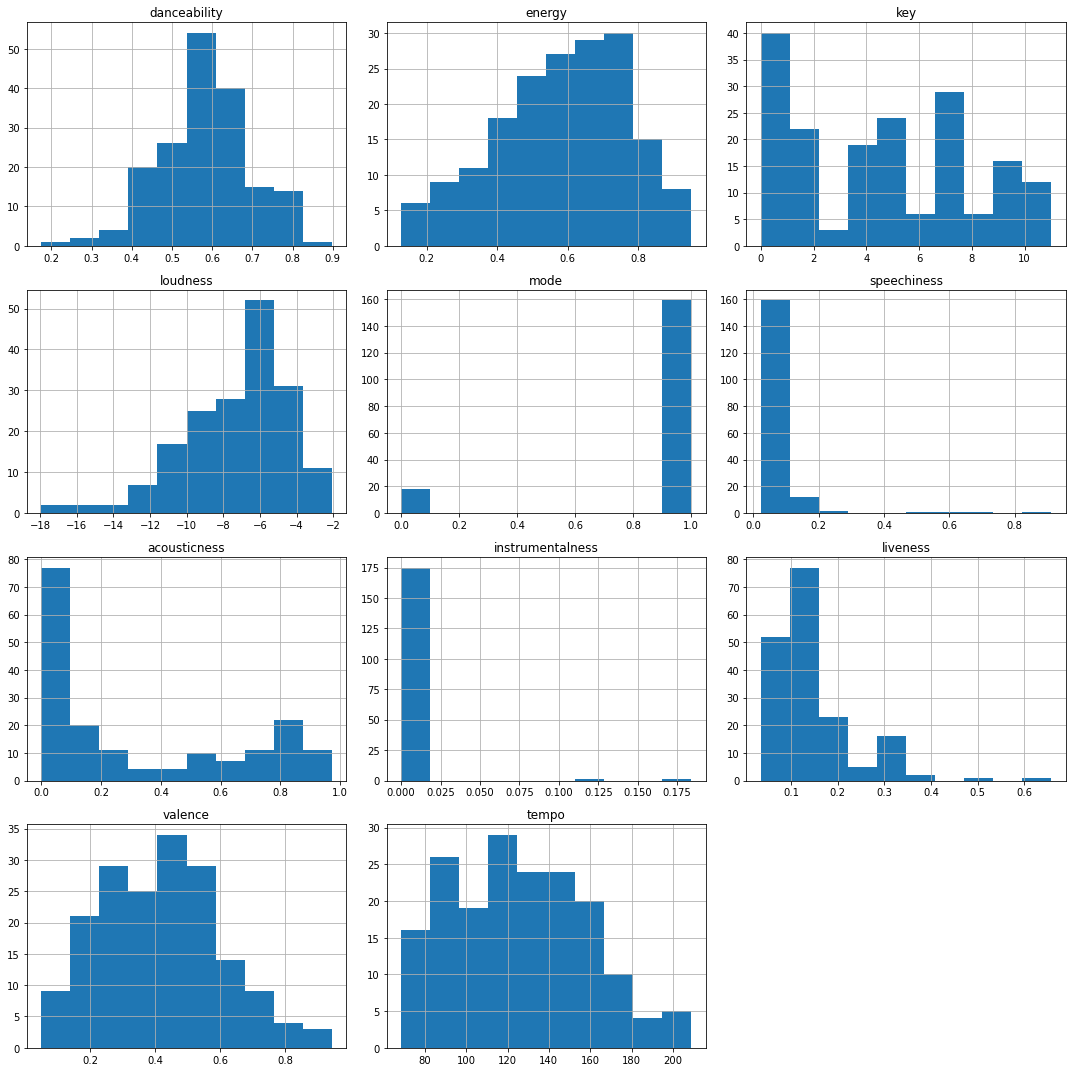

In [8]:
#side by sude histograms
audio_features.hist(figsize=(15,15)) 
plt.tight_layout()
plt.show()

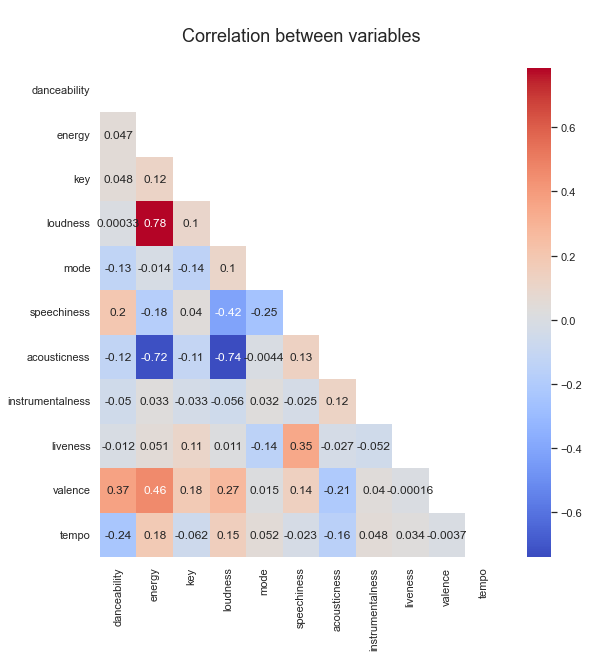

In [9]:
#Correlation heatmap (function from Manu Kalia - https://github.com/manukalia/handy_data_viz_functions)
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

half_masked_corr_heatmap(audio_features, title='Correlation between variables')

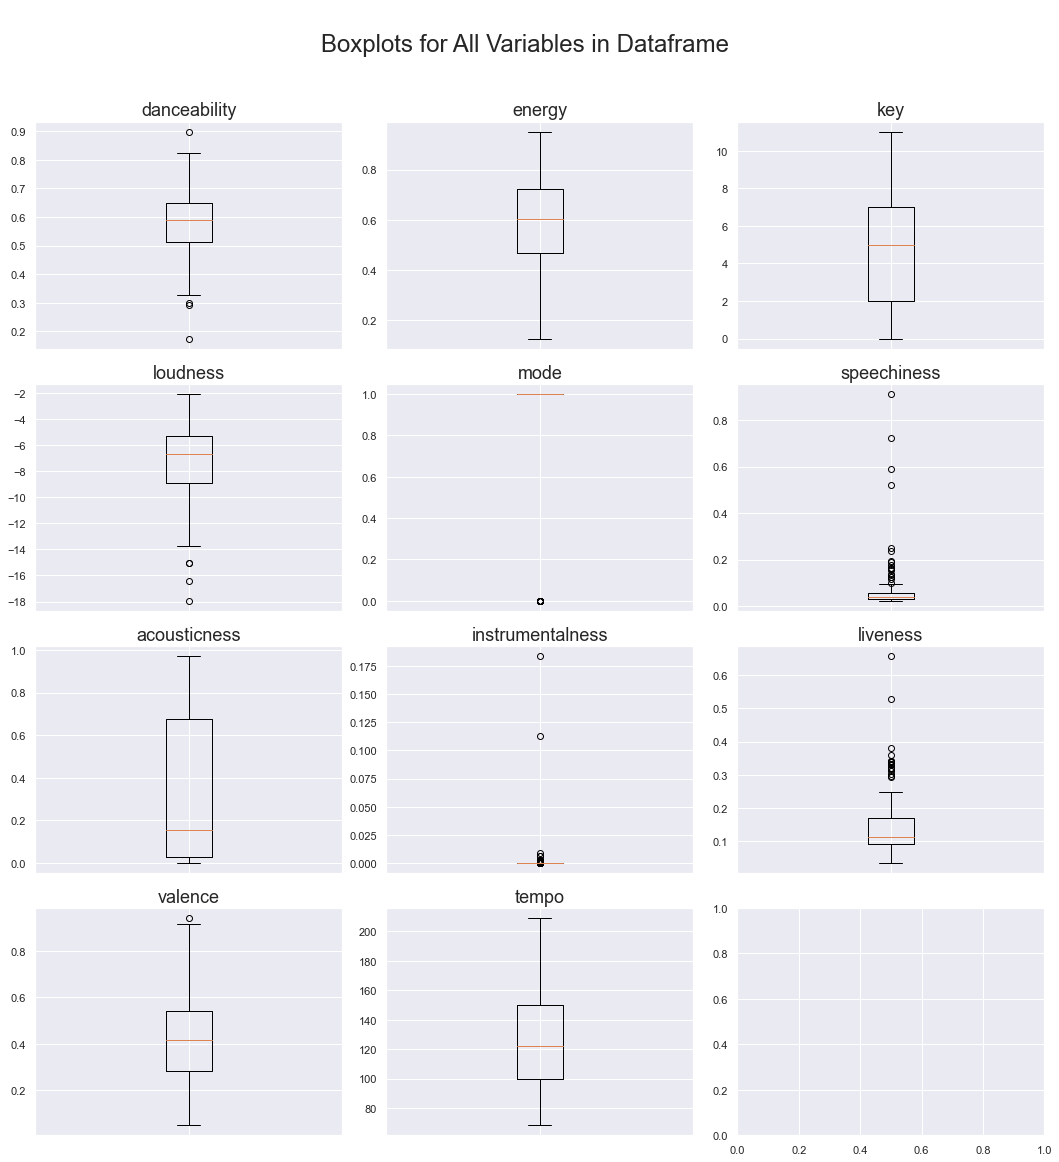

In [10]:
#Side by side boxplots (function from Manu Kalia - https://github.com/manukalia/handy_data_viz_functions)
def gen_boxplots(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].tick_params(labelbottom=False)
        
    fig.suptitle('\nBoxplots for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

gen_boxplots(audio_features, cols=3)

In [11]:
df.to_csv('/Users/jasminflack/Desktop/Portfolio/Portfolio-Work/TaylorSwiftProject/taylor_discography_cleaned.csv', index=False)